# More detailed analytics on cars and mpg

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. To find out which manufacturer has best mileages

In [64]:
df = pd.read_csv("datasets/mpg.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
Unnamed: 0      234 non-null int64
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 22.0+ KB


In [ ]:
df.head()

In [66]:
x = df["manufacturer"].unique()
x

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [67]:
df2 = pd.DataFrame(columns=["manufacturer","max"])   #Create a new dataframe to plot results
for car in x:
    max1 = 0
    for i in range(234):
        if df["manufacturer"].iloc[i] == car:
            if df["cty"].iloc[i] > max1:
                max1 = df["cty"].iloc[i]
                
    df2 = df2.append({"manufacturer":car, "max":max1},ignore_index=True)  #Referred to pandas docs for append syntax
                

In [68]:
df2.head()

,manufacturer,max
0,audi,21
1,chevrolet,22
2,dodge,18
3,ford,18
4,honda,28


<BarContainer object of 15 artists>

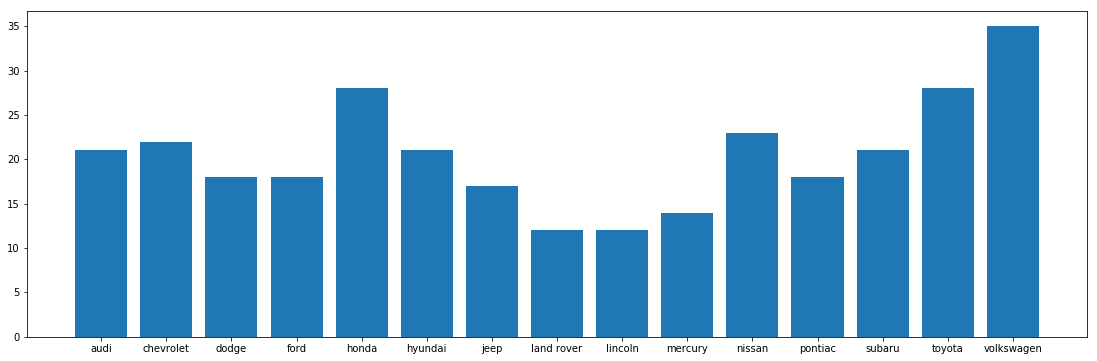

In [69]:
plt.figure(figsize=(19,6))
plt.bar(x, df2["max"])

**We can conclude that *volkswagen* company cars give the highest city mileage of 35**

## 2. To find out which model gives the best city and highway mileage

In [70]:
x = df["model"].unique()
print("Unique models : ", x)
df2 = pd.DataFrame(columns=["manufacturer","city max", "highway max"])
for car in x:
    maxCity = 0
    maxHighway = 0
    
    for i in range(234):
        if df["model"].iloc[i] == car:
            if df["cty"].iloc[i] > maxCity:
                maxCity = df["cty"].iloc[i]
                
    for i in range(234):
        if df["model"].iloc[i] == car:
            if df["hwy"].iloc[i] > maxHighway:
                maxHighway = df["hwy"].iloc[i]
                
    
    df2 = df2.append({"manufacturer":car, "city max":maxCity, "highway max":maxHighway},ignore_index=True)

Unique models :  ['a4' 'a4 quattro' 'a6 quattro' 'c1500 suburban 2wd' 'corvette'
 'k1500 tahoe 4wd' 'malibu' 'caravan 2wd' 'dakota pickup 4wd'
 'durango 4wd' 'ram 1500 pickup 4wd' 'expedition 2wd' 'explorer 4wd'
 'f150 pickup 4wd' 'mustang' 'civic' 'sonata' 'tiburon'
 'grand cherokee 4wd' 'range rover' 'navigator 2wd' 'mountaineer 4wd'
 'altima' 'maxima' 'pathfinder 4wd' 'grand prix' 'forester awd'
 'impreza awd' '4runner 4wd' 'camry' 'camry solara' 'corolla'
 'land cruiser wagon 4wd' 'toyota tacoma 4wd' 'gti' 'jetta' 'new beetle'
 'passat']


In [71]:
df2.head()

,manufacturer,city max,highway max
0,a4,21,31
1,a4 quattro,20,28
2,a6 quattro,17,25
3,c1500 suburban 2wd,14,20
4,corvette,16,26


<BarContainer object of 10 artists>

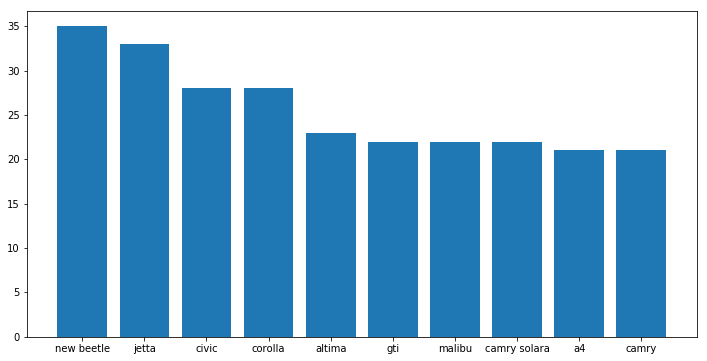

In [72]:
df2 = df2.sort_values(by=["city max"], ascending=False)    #Referred to pandas docs for sort_values syntax
dfTemp = df2[0:10]   #View only top 10 results
plt.figure(figsize=(12,6))
plt.bar(dfTemp["manufacturer"], dfTemp["city max"])

**We can see that *new beetle* has the highest city mileage of 35**

<BarContainer object of 10 artists>

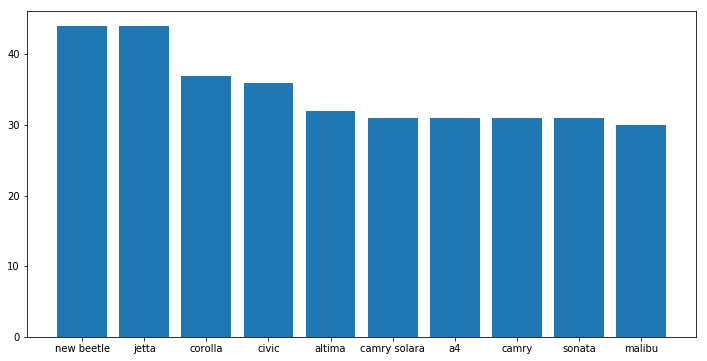

In [73]:
df2 = df2.sort_values(by=["highway max"], ascending=False)
dfTemp = df2[0:10]
plt.figure(figsize=(12,6))
plt.bar(dfTemp["manufacturer"], dfTemp["highway max"])

**We can observe that *new beetle* and *jetta* have the joint highest highway mileage of 44**

## 3. To find out which model gives best of both city and highway mileage combined

In [74]:
x = df["model"].unique()
dfTemp = pd.DataFrame(columns=["model", "combined mileage"])

for model in x:
    
    for i in range(234):
        
        if df["model"].iloc[i] == model:
            
            city = df["cty"].iloc[i]
            highway = df["hwy"].iloc[i]
            average = (city+highway)/2
            
        dfTemp = dfTemp.append({"model":model, "combined mileage":average},ignore_index=True)
            
    

In [75]:
dfTemp = dfTemp.sort_values(by="combined mileage", ascending = False)
dfTemp = dfTemp.drop_duplicates(keep="first")

In [76]:
dfTemp.head()

,model,combined mileage
8645,new beetle,39.5
8402,jetta,38.5
8646,new beetle,35.0
7450,corolla,32.5
7685,land cruiser wagon 4wd,30.5


<BarContainer object of 10 artists>

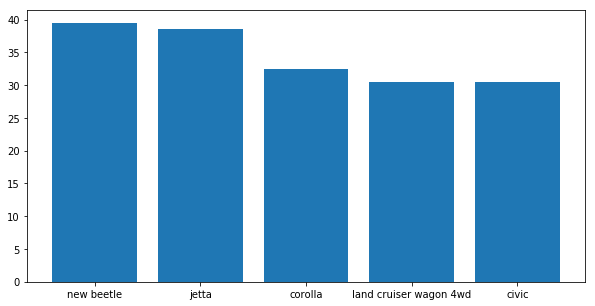

In [78]:
dfTemp2 = dfTemp[0:10]
plt.figure(figsize=(10,5))
plt.bar(dfTemp2["model"], dfTemp2["combined mileage"])

***New Beetle* has the best combined mileage**